# Feature Reading & Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
# read the data
df1 = pd.read_csv('data/2022.06.12.csv')
df2 = pd.read_csv('data/2022.06.13.csv')
df3 = pd.read_csv('data/2022.06.14.csv')

In [2]:
df_dataset = pd.concat([df1, df2, df3])
df_dataset.reset_index(drop=True, inplace=True)
df_dataset = df_dataset.drop(['time_start', 'time_end', 'dest_ip', 'src_ip'], axis=1)

In [3]:
# replace +ve and -ve infinity with NaN
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
# drop missing values
df_dataset.dropna(inplace=True)

df_dataset.drop_duplicates(inplace = True)
print(df_dataset.duplicated().sum())

0


In [4]:
df_dataset["label"].value_counts()

label
benign       434553
outlier      352045
malicious     72182
Name: count, dtype: int64

# Feature Engineering

# Model Training

In [ ]:
df_equal = df_dataset
train, test = train_test_split(df_equal, test_size=0.2)

In [7]:
numerical_columns = ['avg_ipt', 'bytes_in', 'bytes_out', 'dest_port', 'entropy',
                     'num_pkts_out', 'num_pkts_in', 'src_port',
                    'total_entropy', 'duration']
min_max_scaler = MinMaxScaler().fit(train[numerical_columns])
train[numerical_columns] = min_max_scaler.transform(train[numerical_columns])
test[numerical_columns] = min_max_scaler.transform(test[numerical_columns])

print("Full dataset:\n")
print("Benign: " + str(df_equal["label"].value_counts()[[0]].sum()))
print("Outlier: " + str(df_equal["label"].value_counts()[[1]].sum()))
print("Malicious: " + str(df_equal["label"].value_counts()[[2]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["label"].value_counts()[[0]].sum()))
print("Outlier: " + str(train["label"].value_counts()[[1]].sum()))
print("Malicious: " + str(train["label"].value_counts()[[2]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["label"].value_counts()[[0]].sum()))
print("Outlier: " + str(test["label"].value_counts()[[1]].sum()))
print("Malicious: " + str(test["label"].value_counts()[[2]].sum()))

Full dataset:

Benign: 434553
Outlier: 352045
Malicious: 72182
---------------
Training set:

Benign: 347340
Outlier: 281815
Malicious: 57869
---------------
Test set:

Benign: 87213
Outlier: 70230
Malicious: 14313


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\3465864147.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Benign: " + str(df_equal["label"].value_counts()[[0]].sum()))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\3465864147.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Outlier: " + str(df_equal["label"].value_counts()[[1]].sum()))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\3465864147.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

In [8]:
y_train = np.array(train.pop("label"))# pop removes "Label" from the dataframe
X_train = train.values

y_test = np.array(test.pop("label")) # pop removes "Label" from the dataframe
X_test = test.values

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9675


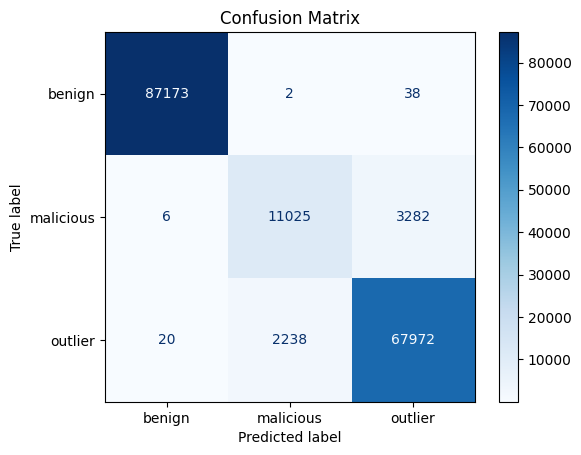

F1 Score: 0.9670
Precision: 0.9667
Recall: 0.9675

Classification Report:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     87213
   malicious       0.83      0.77      0.80     14313
     outlier       0.95      0.97      0.96     70230

    accuracy                           0.97    171756
   macro avg       0.93      0.91      0.92    171756
weighted avg       0.97      0.97      0.97    171756



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, precision_score, recall_score

conf_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


### Decision Tree

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)

# parameters = {'max_depth': randint(2, 10), 'min_samples_split': randint(2, 10), 'min_samples_leaf': [1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy']}

# random_search = RandomizedSearchCV(dt, param_distributions=parameters, n_iter=20, cv=5, n_jobs=-1)
# random_search.fit(X_train, y_train)
# best_accuracy = random_search.best_score_
# best_parameters = random_search.best_params_

# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

Best Accuracy: 97.16 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# from sklearn import metrics
# best_dt = DecisionTreeClassifier(**random_search.best_params_)
# best_dt.fit(X_train,y_train)

# # Predicting Train & Test Results
# y_dt = best_dt.predict(X_train)
# y_pred_dt = best_dt.predict(X_test)

# # Accuracy
# print("Accuracy on Training set: ",metrics.accuracy_score(y_train, y_dt))
# print("Accuracy on Testing set: ",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy on Training set:  0.9730300542630242
Accuracy on Testing set:  0.9725133328675563


### RandomForest Hyperparameter adjustment

In [ ]:
# rf = RandomForestClassifier(n_estimators=60, random_state=42)

# parameters = {'n_estimators': randint(50, 1000), 'max_depth': randint(2, 10), 'min_samples_split': randint(2, 20),
#               'min_samples_leaf': randint(1, 10), 'max_features': ['sqrt', 'log2', None]}

# random_search = RandomizedSearchCV(rf, param_distributions=parameters, n_iter=20, cv=5, n_jobs=-1)
# random_search.fit(X_train, y_train)
# best_accuracy = random_search.best_score_
# best_parameters = random_search.best_params_

# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

Best Accuracy: 97.23 %
Best Parameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 13, 'n_estimators': 471}


In [ ]:
# best_rf = RandomForestClassifier(**random_search.best_params_)
# best_rf.fit(X_train, y_train)

# # Predicting Train & Test Results
# y_rf = best_rf.predict(X_train)
# y_pred_rf = best_rf.predict(X_test)

# # Accuracy
# print("Accuracy on Training set: ",metrics.accuracy_score(y_train, y_rf))
# print("Accuracy on Testing set: ",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy on Training set:  0.9723080998625958
Accuracy on Testing set:  0.9717622674025944
